In [1]:
pip install idx2numpy

  Preparing metadata (setup.py) ... done
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7905 sha256=1bf4d4ad4638ec6e731371d19b924691c87cca0dd6f2940dd0093e4d26f2c7a7
  Stored in directory: /root/.cache/pip/wheels/e0/f4/e7/643fc5f932ec2ff92997f43f007660feb23f948aa8486f1107
Successfully built idx2numpy


In [3]:
import idx2numpy
import numpy as np

def readMNIST(image_file, label_file, num_images, offset):
    # Read images
    images = idx2numpy.convert_from_file(image_file)

    # Read labels
    labels = idx2numpy.convert_from_file(label_file)

    # Select the desired number of images and labels
    images = images[offset:offset+num_images]
    labels = labels[offset:offset+num_images]

    return images, labels

In [4]:
[train_imgs, train_labels] = readMNIST('train-images.idx3-ubyte', 'train-labels.idx1-ubyte', 60000, 0);
[test_imgs, test_labels] = readMNIST('t10k-images.idx3-ubyte', 't10k-labels.idx1-ubyte', 10000, 0);

In [5]:
import pandas as pd
import numpy as np

# Assuming 'train_imgs', 'train_labels', 'test_imgs', 'test_labels' are NumPy arrays

# Flatten and transpose the 3D arrays
flattened_train_imgs = train_imgs.reshape(train_imgs.shape[0], -1)
flattened_test_imgs = test_imgs.reshape(test_imgs.shape[0], -1)

# Create DataFrames
x_train = pd.DataFrame(flattened_train_imgs.T)
y_train = pd.DataFrame(train_labels, columns=['Label']).T  # Assuming 'train_labels' is a 1D array or list

x_test = pd.DataFrame(flattened_test_imgs.T)
y_test = pd.DataFrame(test_labels, columns=['Label']).T  # Assuming 'test_labels' is a 1D array or list


In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(784, 60000)
(1, 60000)
(784, 10000)
(1, 10000)


In [7]:
labels = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9"
}

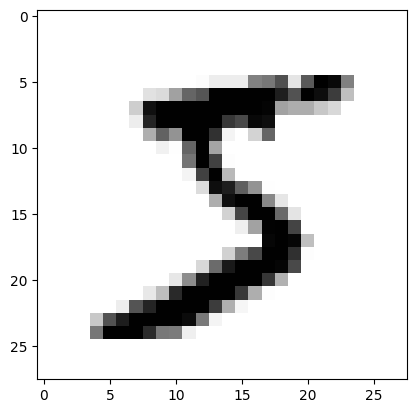

In [8]:
import matplotlib.pyplot as plt
digit_image=x_train[0]
plt.imshow(digit_image.to_numpy().reshape(28,28),cmap='binary')

In [9]:
alpha_matrices = {}
for i in range(10):
    alpha_matrices.update({"A"+str(i): x_train.loc[:, list(y_train.values[0] == i)]})

In [15]:
print(alpha_matrices['A1'].shape)

(784, 6742)


In [17]:
import numpy as np
left_singular={}
singular_matix={}
right_singular={}
for i in range(10):
    u, s, v_t = np.linalg.svd(alpha_matrices['A'+str(i)], full_matrices=False)
    left_singular.update({"u"+str(i):u})
    singular_matix.update({"s"+str(i):s})
    right_singular.update({"v_t"+str(i):v_t})

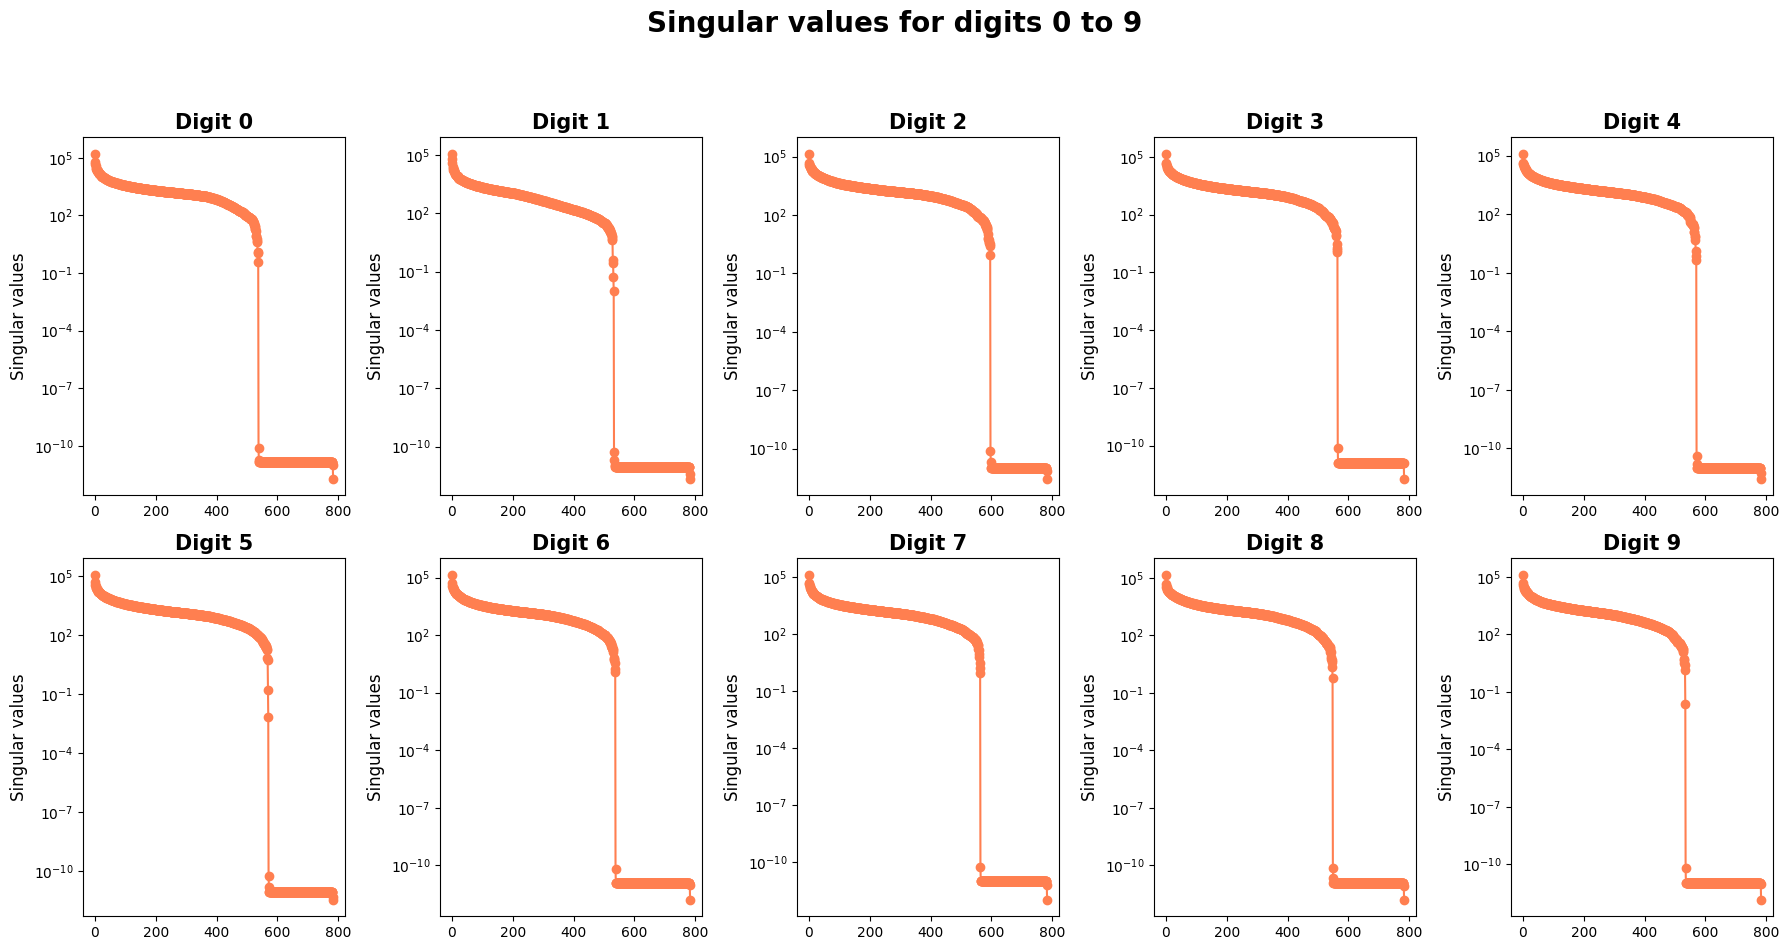

In [28]:
import matplotlib.pyplot as plt

def plot_singular_subplots(singular_matrix):
    fig, axs = plt.subplots(2, 5, figsize=(18, 9))
    fig.suptitle('Singular values for digits 0 to 9', fontsize=20, weight="bold", y=1.05)
    for i in range(10):
        row = i // 5
        col = i % 5
        axs[row, col].plot(singular_matrix['s'+str(i)], color='coral', marker='o')
        axs[row, col].set_title('Digit {}'.format(i), fontsize=15, weight="bold")
        axs[row, col].set_ylabel('Singular values', fontsize=12)
        axs[row, col].set_yscale('log')
    plt.tight_layout()
    plt.show()

# Usage
plot_singular_subplots(singular_matix)


In [34]:
# Assuming 'singular_matix' is a dictionary containing singular values for each digit
threshold_percentage = 10  # Adjust as needed
threshold = threshold_percentage / 100 * np.max(singular_matix['s4'])

In [35]:
import numpy as np

def calculate_rank_for_digits(singular_matrix, threshold_percentage):
    ranks = {}
    for i in range(10):
        threshold = threshold_percentage / 100 * np.max(singular_matrix['s'+str(i)])
        rank = np.sum(singular_matrix['s'+str(i)] > threshold)
        ranks['Digit '+str(i)] = rank
    return ranks

# Usage
threshold_percentage = 1  # Adjust as needed
ranks = calculate_rank_for_digits(singular_matix, threshold_percentage)
for digit, rank in ranks.items():
    print(f'The rank for {digit} is: {rank}')


The rank for Digit 0 is: 243
The rank for Digit 1 is: 188
The rank for Digit 2 is: 315
The rank for Digit 3 is: 292
The rank for Digit 4 is: 304
The rank for Digit 5 is: 318
The rank for Digit 6 is: 260
The rank for Digit 7 is: 278
The rank for Digit 8 is: 288
The rank for Digit 9 is: 256
